In [23]:
# Generic stuff
from io import StringIO

# Numerical stuff
import numpy as np

# ML stuff
from sklearn import neighbors
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_graphviz
from sklearn.feature_selection import mutual_info_classif

# Viz stuff
import matplotlib.pyplot as plt
from graphviz import Source

# Tree based methods

## Introduction
There is a strong link between tree based methods, feature selection, and random projection. Among the best advantages I see for tree based methods, there is:
* Key enabler for model explainability / understanding
* Strong classifier with arbitrary high performances
* Allows to study random linear projections withing a slightly different framework than linear algebra

## Many models
There are a lot of models that are based on either decision trees-like methods. To write this notebook, we used the following references:

https://victorzhou.com/blog/intro-to-random-forests/
https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart

## Metric based branching
To decide wether the current proposed branching condition makes the classifier to perform better or worst, a metric is used. Among the most common metric, we can cite:
* Gini impurity: [explanation here](https://victorzhou.com/blog/gini-impurity/).
* Information Gain [explanation here](https://victorzhou.com/blog/information-gain/).

## Feature importance

Random forest, among other methods can be used for feature selection, see for instance this document from sklearn: https://scikit-learn.org/stable/modules/feature_selection.html

Here is an example of how decision trees can be used to improve model explainability:

In [25]:
X = [[1,0,0], [0,0,0], [0,0,1], [0,1,0]]
y = [1,0,1,1]

clf = DecisionTreeClassifier()
clf.fit(X, y)
feat_importance = clf.tree_.compute_feature_importances(normalize=False)
print("feat importance = " + str(feat_importance))
dot_data = sklearn.tree.export_graphviz(clf)
out = StringIO()
out = export_graphviz(clf, out_file='tree.dot')
s = Source.from_file('tree.dot')
s.view()

feat importance = [0.25       0.04166667 0.08333333]


/home/gnthibault/anaconda3/lib/python3.6/site-packages/sklearn/tree/export.py:399: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


'tree.dot.pdf'

## Regression with random trees

Random forest can not only be used for classification but also for regression.

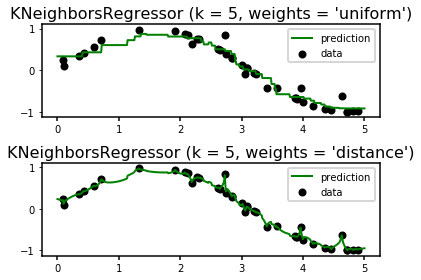

In [9]:
# Example here is directly inspired by the one from Alexandre Gramfort <alexandre.gramfort@inria.fr>
# and Fabian Pedregosa <fabian.pedregosa@inria.fr>
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html#sphx-glr-auto-examples-neighbors-plot-regression-py
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
n_neighbors = 5

fig, ax = plt.subplots(2, 1)
for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)
    ax[i].scatter(X, y, c='k', label='data')
    ax[i].plot(T, y_, c='g', label='prediction')
    ax[i].axis('tight')
    ax[i].legend()
    ax[i].set_title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))
fig.tight_layout()